<a href="https://colab.research.google.com/github/Akramraza12349/The-Global-terrorism-data-analysis/blob/main/Akram_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [43]:
# Importing all the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Setting options for better output formatting 
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)

**1.Reading the GTD data set** 

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
file_path='/content/drive/MyDrive/AlmaBetter/Capstone Project/Global Terrorism Data.csv'
# creating data frame 
df=pd.read_csv(file_path,encoding='latin-1',low_memory=False)

2. Data Exploration

In [47]:
# To find the top 5 rows of data frame 
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [48]:
# tail of the dataframe
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

In [49]:
# to find the shape of data frame 
df.shape

(181691, 135)

In [50]:
# To find out the  information of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [51]:
# Description of the dataframe
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [52]:
# columns of dataframe
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'], dtype='object', length=135)

3. Data cleaning

In [53]:

# creating data frame where null values are more than 30%
df_new=df.loc[:,(df.isnull().mean()*100)<30]


In [54]:
# shape of the new data frame 
df_new.shape

(181691, 48)

In [55]:
df_new.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'nkill', 'nwound', 'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [56]:
df_new.columns = ['event_id', 'Year', 'Month', 'Day', 'extended', 'country_id',
       'Country', 'region_id', 'Region', 'provstate', 'City', 'Latitude',
       'Longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'Multiple', 'Success', 'Suicide', 'attacktype1',
       'attack_type', 'targtype1', 'targt_type', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'Nationality',
       'Group', 'guncertain1', 'Individual', 'weaptype1', 'weapon_type',
       'weapsubtype1', 'weapsubtype1_txt', 'Deaths','Wounds', 'Property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']

In [57]:
df_new=df_new[['event_id','Year', 'Month', 'Day', 'extended', 'Country', 'Region',
         'City', 'Latitude', 'Longitude', 'Multiple', 'Success',
         'Suicide', 'attack_type', 'targt_type', 'Nationality', 'Group',
         'Individual', 'weapon_type', 'Deaths','Wounds']]

In [58]:
df_new.shape

(181691, 21)

In [59]:
# Head of the dataframe after selecting the required columns
df_new.head()

,event_id,Year,Month,Day,extended,Country,Region,City,Latitude,Longitude,Multiple,Success,Suicide,attack_type,targt_type,Nationality,Group,Individual,weapon_type,Deaths,Wounds
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0.0,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0,Unknown,1.0,0.0
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0,Unknown,0.0,0.0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0.0,1,0,Assassination,Journalists & Media,United States,Unknown,0,Unknown,1.0,0.0
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0.0,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0,Explosives,NaN,NaN
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0,Incendiary,NaN,NaN


In [60]:
# How much percentage of null value is still there in remaining columns
for i in range(df_new.shape[1]):
    null_count = df_new.isnull().sum()[i]*100/df_new.shape[0]
    print(f'{df_new.columns[i]} has {int(null_count)}% of missing values')

event_id has 0% of missing values
Year has 0% of missing values
Month has 0% of missing values
Day has 0% of missing values
extended has 0% of missing values
Country has 0% of missing values
Region has 0% of missing values
City has 0% of missing values
Latitude has 2% of missing values
Longitude has 2% of missing values
Multiple has 0% of missing values
Success has 0% of missing values
Suicide has 0% of missing values
attack_type has 0% of missing values
targt_type has 0% of missing values
Nationality has 0% of missing values
Group has 0% of missing values
Individual has 0% of missing values
weapon_type has 0% of missing values
Deaths has 5% of missing values
Wounds has 8% of missing values


In [61]:
# Data types of final variables
df_new.dtypes

event_id         int64
Year             int64
Month            int64
Day              int64
extended         int64
Country         object
Region          object
City            object
Latitude       float64
Longitude      float64
Multiple       float64
Success          int64
Suicide          int64
attack_type     object
targt_type      object
Nationality     object
Group           object
Individual       int64
weapon_type     object
Deaths         float64
Wounds         float64
dtype: object

4. Analyzing and visualizing the data

In [62]:
#No.of attacks per year in descending order
print('Years that have highest number of attacks')
df_new.groupby('Year')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:10]

Years that have highest number of attacks


,Year,event_id
43,2014,16903
44,2015,14965
45,2016,13587
42,2013,12036
46,2017,10900
41,2012,8522
40,2011,5076
22,1992,5071
39,2010,4826
37,2008,4805


In [63]:
#Countries that were oftenly attacked
print('Countries that were attacked the most')
df_new.groupby('Country')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:10]

Countries that were attacked the most


,Country,event_id
84,Iraq,24636
134,Pakistan,14368
0,Afghanistan,12731
80,India,11960
35,Colombia,8306
140,Philippines,6908
139,Peru,6096
52,El Salvador,5320
188,United Kingdom,5235
183,Turkey,4292


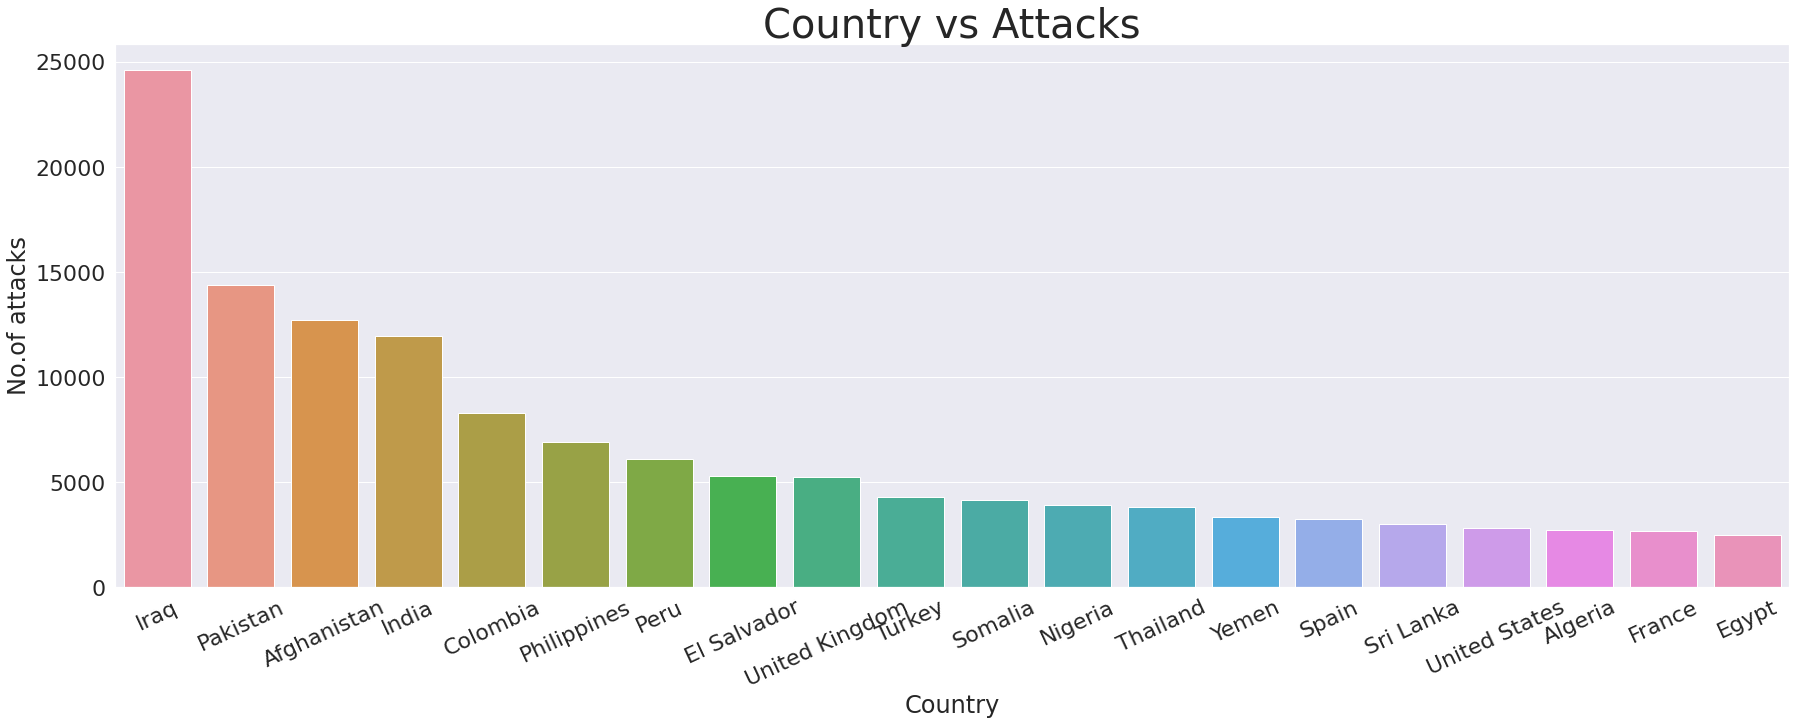

In [64]:
# plotting the top 20 countries which were attacked most 
sns.set(font_scale=2)
plt.figure(figsize=(30,10))
temp = df_new.groupby('Country')['event_id'].count().reset_index().sort_values('event_id',ascending=False)[:20]
temp.rename(columns = {'event_id':'No.of attacks'},inplace=True)
sns.barplot(x='Country',y='No.of attacks',data = temp)
plt.title('Country vs Attacks',fontsize=40)
plt.xticks(rotation=25)
plt.show()


In [65]:
# different types of attack
df_new['attack_type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [66]:
# count of different types of attack
attacks_count = df_new.groupby('attack_type')['event_id'].count().reset_index().rename(columns = {'event_id':'number_of_attacks'})
attacks_count

,attack_type,number_of_attacks
0,Armed Assault,42669
1,Assassination,19312
2,Bombing/Explosion,88255
3,Facility/Infrastructure Attack,10356
4,Hijacking,659
5,Hostage Taking (Barricade Incident),991
6,Hostage Taking (Kidnapping),11158
7,Unarmed Assault,1015
8,Unknown,7276


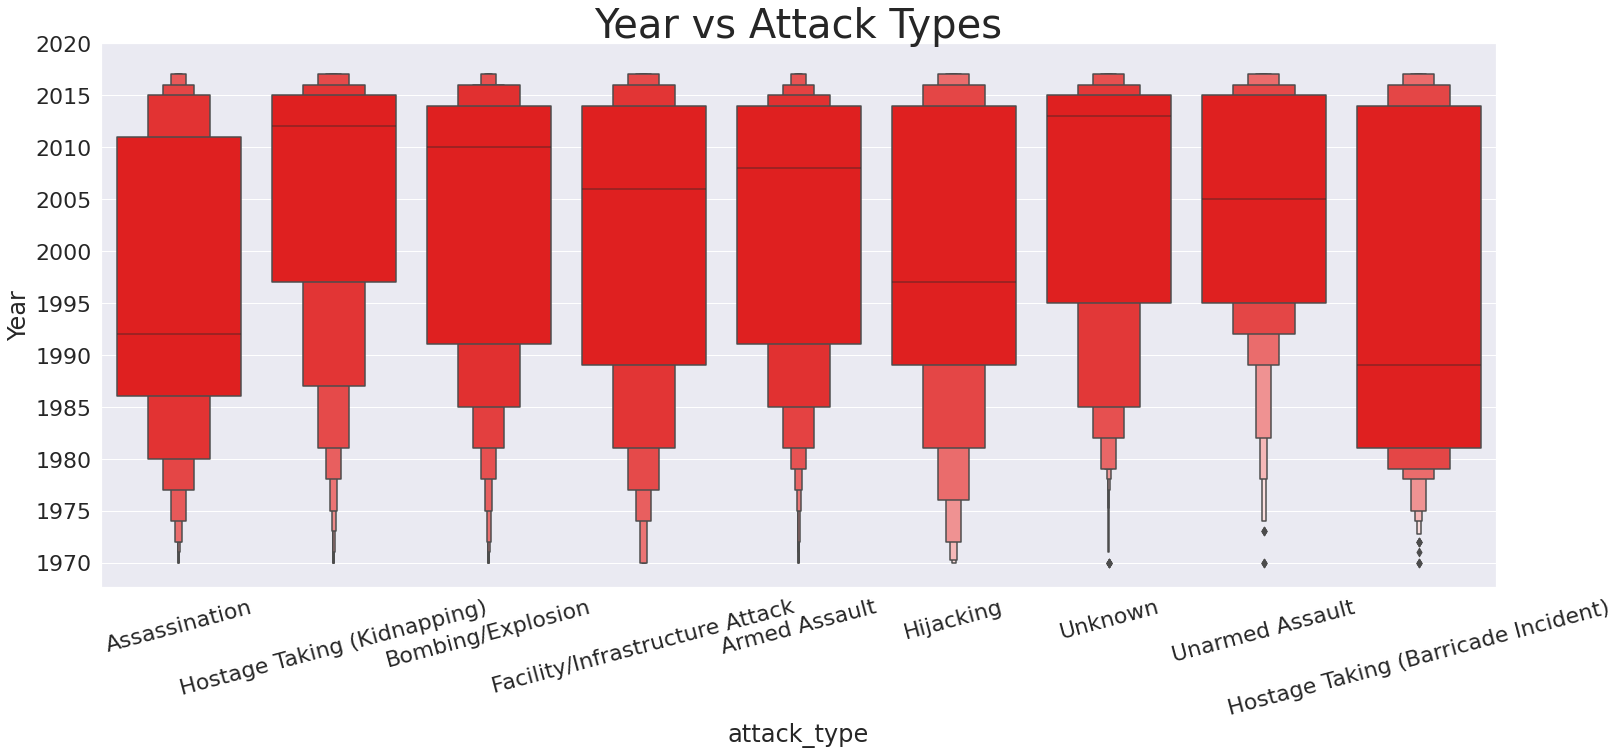

In [67]:
#visualizing the attack types that are more often with respect the period of time
sns.set(font_scale = 2)
plt.figure(figsize=(25, 10))
temp = sns.boxenplot(x="attack_type", y="Year",color="red", data=df_new)
temp.set_yticks(range(1970,2021,5))
plt.title('Year vs Attack Types',fontsize=40)
plt.xticks(rotation=15)
plt.show()

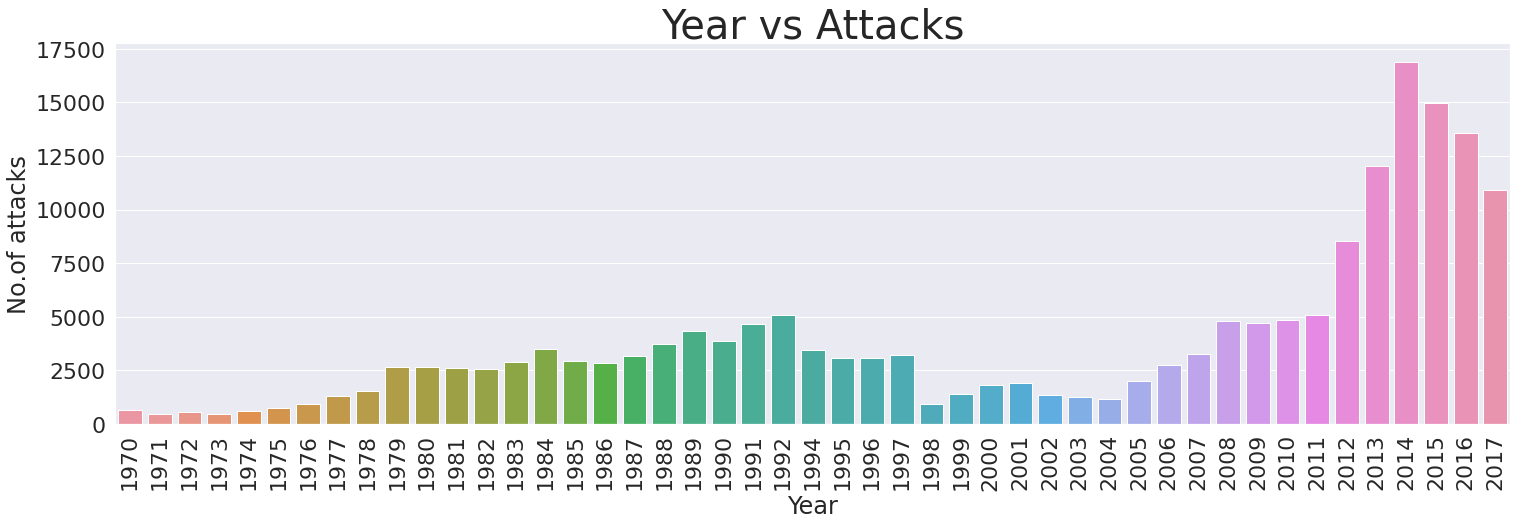

In [68]:
#Plotting the years and no.of attacks in that year
sns.set(font_scale = 2)
plt.figure(figsize=(25, 7))
temp = df_new.groupby('Year')['event_id'].count().reset_index()
temp.rename(columns = {'event_id':'No.of attacks'},inplace=True)
sns.barplot(x='Year',y='No.of attacks',data = temp)
plt.title('Year vs Attacks',fontsize=40)
plt.xticks(rotation=90)
plt.show()

We can observe from the above the graph there is sudden spike in the number of attacks after 20004. So we deep dived into the data to find out the exact reason behind the sudden spike


5. Deep diving into the reason for sudden spike

In [69]:
before = df_new[df_new['Year']<=2004]
before.index = np.arange(1, len(before) + 1)
before.groupby('Country')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:10]

,Country,event_id
34,Colombia,6832
138,Peru,6035
51,El Salvador,5320
185,United Kingdom,4378
79,India,3944
163,Spain,3112
180,Turkey,2594
186,United States,2509
59,France,2375
139,Philippines,2357


In [70]:
after = df_new[df_new['Year']>2004]
after.index = np.arange(1, len(after) + 1)
after.groupby('Country')['event_id'].count().reset_index().sort_values(by='event_id',ascending=False)[:10]

,Country,event_id
65,Iraq,24031
0,Afghanistan,12353
105,Pakistan,12307
62,India,8016
110,Philippines,4551
124,Somalia,3954
103,Nigeria,3794
138,Thailand,3543
155,Yemen,3209
83,Libya,2235


In [71]:
!pip install pyproj==1.9.6

In [72]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip (133.1 MB)


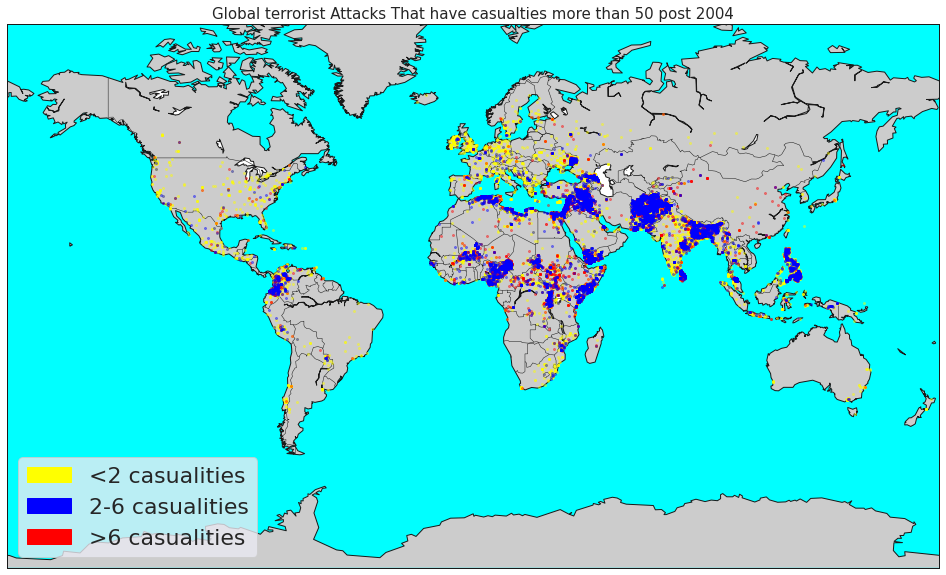

In [73]:
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
pd.options.mode.chained_assignment = None
after['casualities'] = after['Wounds'] + after['Deaths']
global_map = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

lat_=list(after[after['casualities']<=2].Latitude)
long_=list(after[after['casualities']<=2].Longitude)
x_,y_=global_map(long_,lat_)
global_map.plot(x_, y_,'go',markersize=2,color = 'yellow',alpha=0.4)

lat_=list(after[after['casualities']>6].Latitude)
long_=list(after[after['casualities']>6].Longitude)
x_,y_=global_map(long_,lat_)
global_map.plot(x_, y_,'go',markersize=2,color = 'red',alpha=0.4)

lat_=list(after[(after['casualities']>2) & (after['casualities']<=6)].Latitude)
long_=list(after[(after['casualities']>2) & (after['casualities']<=6)].Longitude)
x_,y_=global_map(long_,lat_)
global_map.plot(x_, y_,'go',markersize=2,color = 'blue',alpha=0.4)

global_map.drawcoastlines()
global_map.drawcountries()
global_map.fillcontinents(lake_color='white')
global_map.drawmapboundary(fill_color='#00ffff')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Global terrorist Attacks That have casualties more than 50 post 2004',fontsize = 15)

plt.legend(loc='lower left',handles=[mpatches.Patch(color='yellow',label='<2 casualities'),mpatches.Patch(color='blue',label='2-6 casualities'),mpatches.Patch(color='red',label='>6 casualities')])

plt.show()

We can observe that the most of the red part(i.e regions wiht more than 50 casualities) are in the regions of Iraq, Afghanistan , Pakistan and Indian

In [74]:
# casualties
df_new['Casualities'] = df_new['Deaths']+df_new['Wounds']
Iraq_data = df_new[df_new['Country']=='Iraq'].groupby('Year')['Casualities'].sum().reset_index()
Afg_data = df_new[df_new['Country']=='Afghanistan'].groupby('Year')['Casualities'].sum().reset_index()
Pak_data = df_new[df_new['Country']=='Pakistan'].groupby('Year')['Casualities'].sum().reset_index()
Ind_data = df_new[df_new['Country']=='India'].groupby('Year')['Casualities'].sum().reset_index()

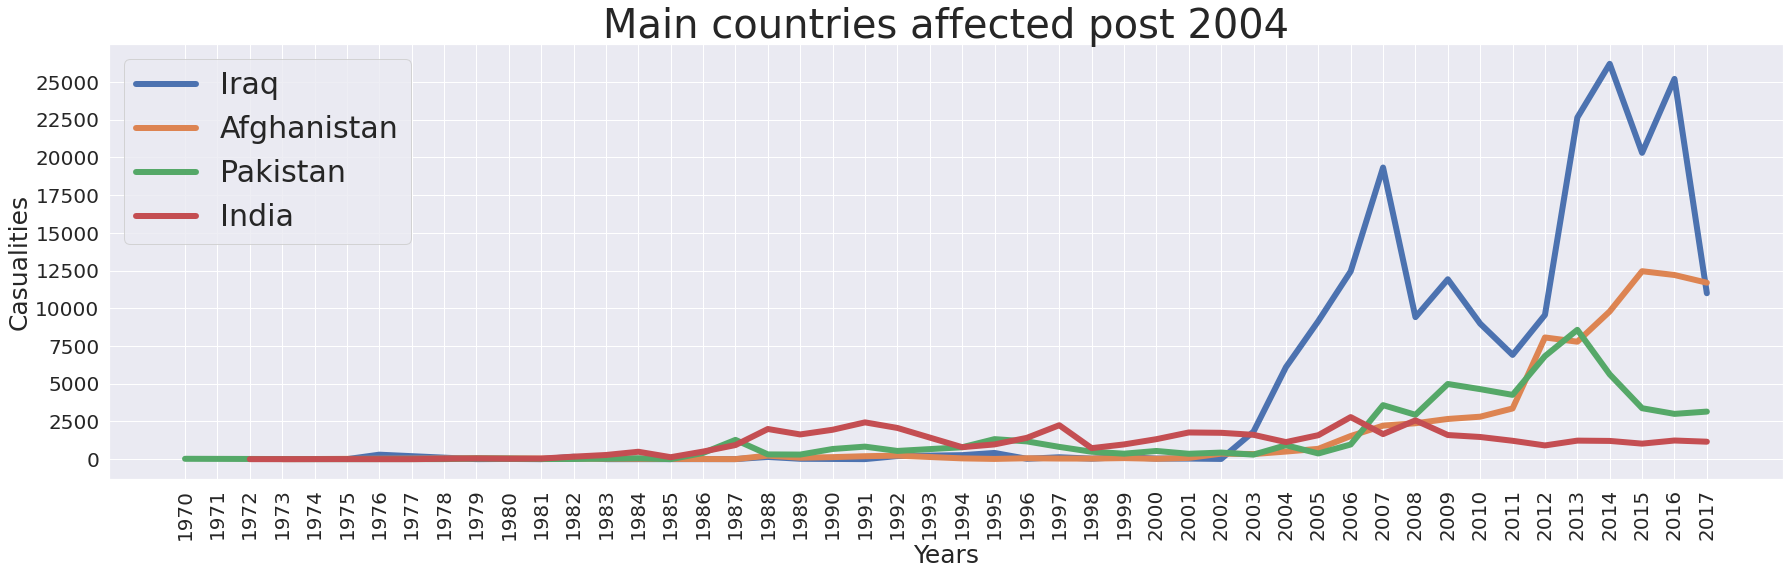

In [75]:
#Casualities of the 4 countries after and before 2004
plt.figure(figsize=(30, 8))
a = sns.lineplot(x='Year',y='Casualities',data=Iraq_data,linewidth = 6,label='Iraq')
a = sns.lineplot(x='Year',y='Casualities',data=Afg_data,linewidth = 6,label='Afghanistan')
a = sns.lineplot(x='Year',y='Casualities',data=Pak_data,linewidth = 6,label='Pakistan')
a = sns.lineplot(x='Year',y='Casualities',data=Ind_data,linewidth = 6,label='India')
sns.set(font_scale = 10)
a.set_xticks(range(1970,2018))
a.set_yticks(range(0,25001,2500))
a.set_xticklabels(a.get_xticks(), size = 20)
a.set_yticklabels(a.get_yticks(), size = 20)
a.set_xlabel("Years", fontsize = 25)
a.set_ylabel("Casualities", fontsize = 25)
plt.title('Main countries affected post 2004',fontsize=40)
plt.xticks(rotation=90)
plt.legend(fontsize=30)
plt.show()

 Before 2004 there very few casualties in the above 4 countries. But post after 2004 we can observe the sudden rise in it. 

In [76]:
# sorting out pre and post 2004 data on no of attacks in these countries
pre_2004_df = df_new[df_new['Year']<2005].groupby(['Latitude','Longitude']).size().reset_index()
pre_2004_df.columns = ['latitude', 'longitude', 'count_of_attacks']

post_2004_df = df_new[df_new['Year']>2004].groupby(['Latitude','Longitude']).size().reset_index()
post_2004_df.columns = ['latitude', 'longitude', 'count_of_attacks']

<Figure size 432x288 with 0 Axes>

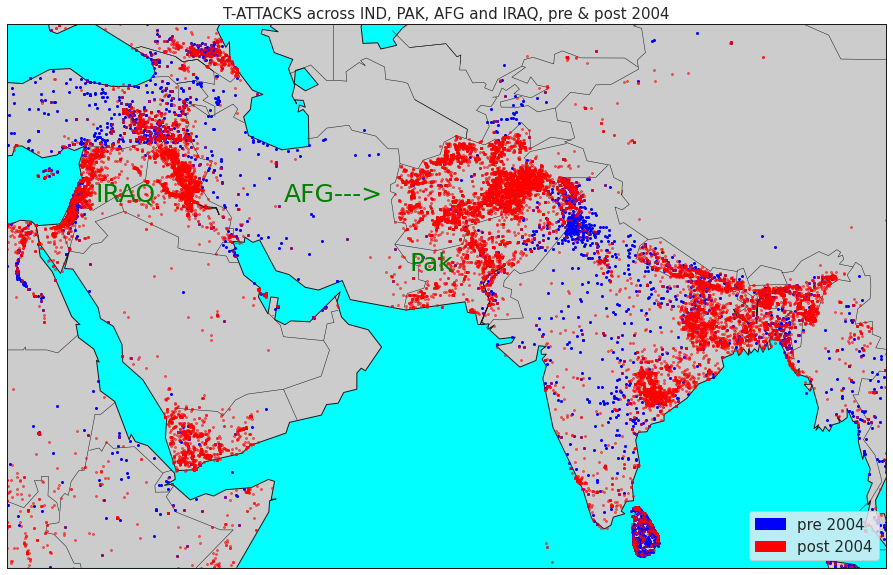

In [77]:
# plotting terrorist activities across AFG,Ind, Pak and IRAQ over the period of 1970 to 2017
#change figure size accordingly
#pd.options.mode.chained_assignment = None

fig=plt.gcf()
fig = plt.figure(figsize=(25,10))
m = Basemap(projection='mill',llcrnrlat=5,urcrnrlat=45,\
            llcrnrlon=30,urcrnrlon=100,resolution='c', lat_ts=20,lat_0=True,lat_1=True)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(lake_color='#00ffff')
m.drawmapboundary(fill_color='#00ffff')


lat_= pre_2004_df['latitude'].tolist()
long_=pre_2004_df['longitude'].tolist()
x_,y_=m(long_,lat_)
m.plot(x_, y_,'go',markersize=2,color = 'blue',alpha=1, label='Pre 2004')

lat_= post_2004_df['latitude'].tolist()
long_= post_2004_df['longitude'].tolist()
x_,y_=m(long_,lat_)
m.plot(x_, y_,'go',markersize=2,color = 'red',alpha=0.5, label='Post 2004')


# plt.title("Terrorist activies across Iraq, AFG and PAK between 1970 to 2017")
plt.legend(loc='lower right',handles=[mpatches.Patch(color='blue',label='pre 2004'), mpatches.Patch(color='red',label='post 2004')], prop={'size':15})
plt.title("T-ATTACKS across IND, PAK, AFG and IRAQ, pre & post 2004",fontsize = 15)

x,y = m(62,28)
plt.text(x,y,'Pak',color='Green',fontsize=25)
x,y = m(52,33)
plt.text(x,y,'AFG--->',color='Green',fontsize=25)
x,y = m(37,33)
plt.text(x,y,'IRAQ',color='Green',fontsize=25)
plt.show()

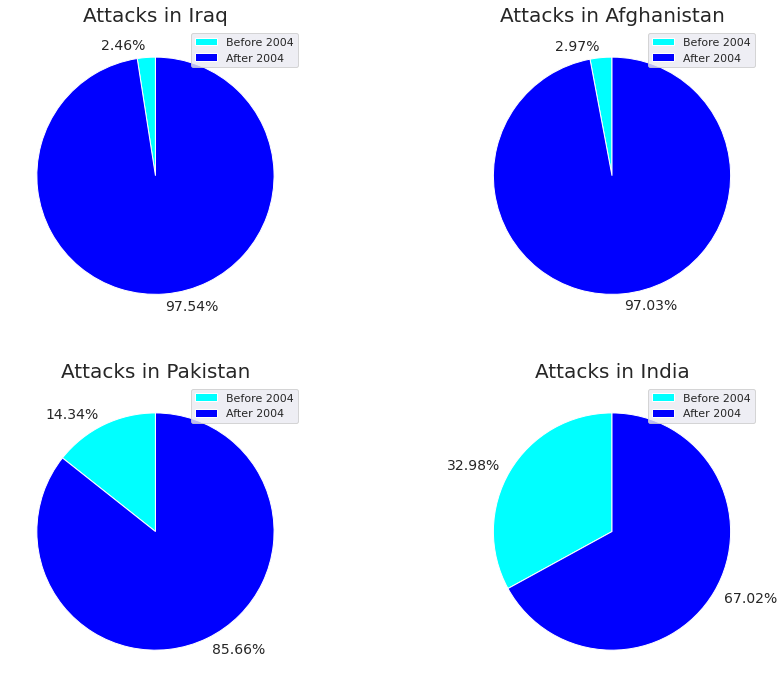

In [78]:
#ratio of the attacks of the 4 countries before and after 2004
def country_attacks(country):
    before_attacks = before[before['Country']==country].shape[0]
    after_attacks = after[after['Country']==country].shape[0]
    total_attacks = before_attacks + after_attacks
    return [before_attacks/total_attacks,after_attacks/total_attacks]

plt.figure(figsize=(15, 12))
Iraq_pie = np.array(country_attacks('Iraq'))
Afgh_pie = np.array(country_attacks('Afghanistan'))
Pak_pie = np.array(country_attacks('Pakistan'))
Ind_pie = np.array(country_attacks('India'))
countries = ['Iraq','Afghanistan','Pakistan','India']
pies = [Iraq_pie,Afgh_pie,Pak_pie,Ind_pie]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title('Attacks in ' + countries[i],fontsize = 20)
    plt.pie(pies[i],radius = 1,colors = ['#00FFFF','blue'],labels = [str(round(i*100,2))
            +'%' for i in country_attacks(countries[i])],textprops={'fontsize': 14},startangle = 90)
    plt.legend(['Before 2004','After 2004'],fontsize = 11)
plt.show()

We can observe clearly that more than 90% of the attacks on these contries happened after 2004.
So let's try to find the major terrorist groups behind these attacks.

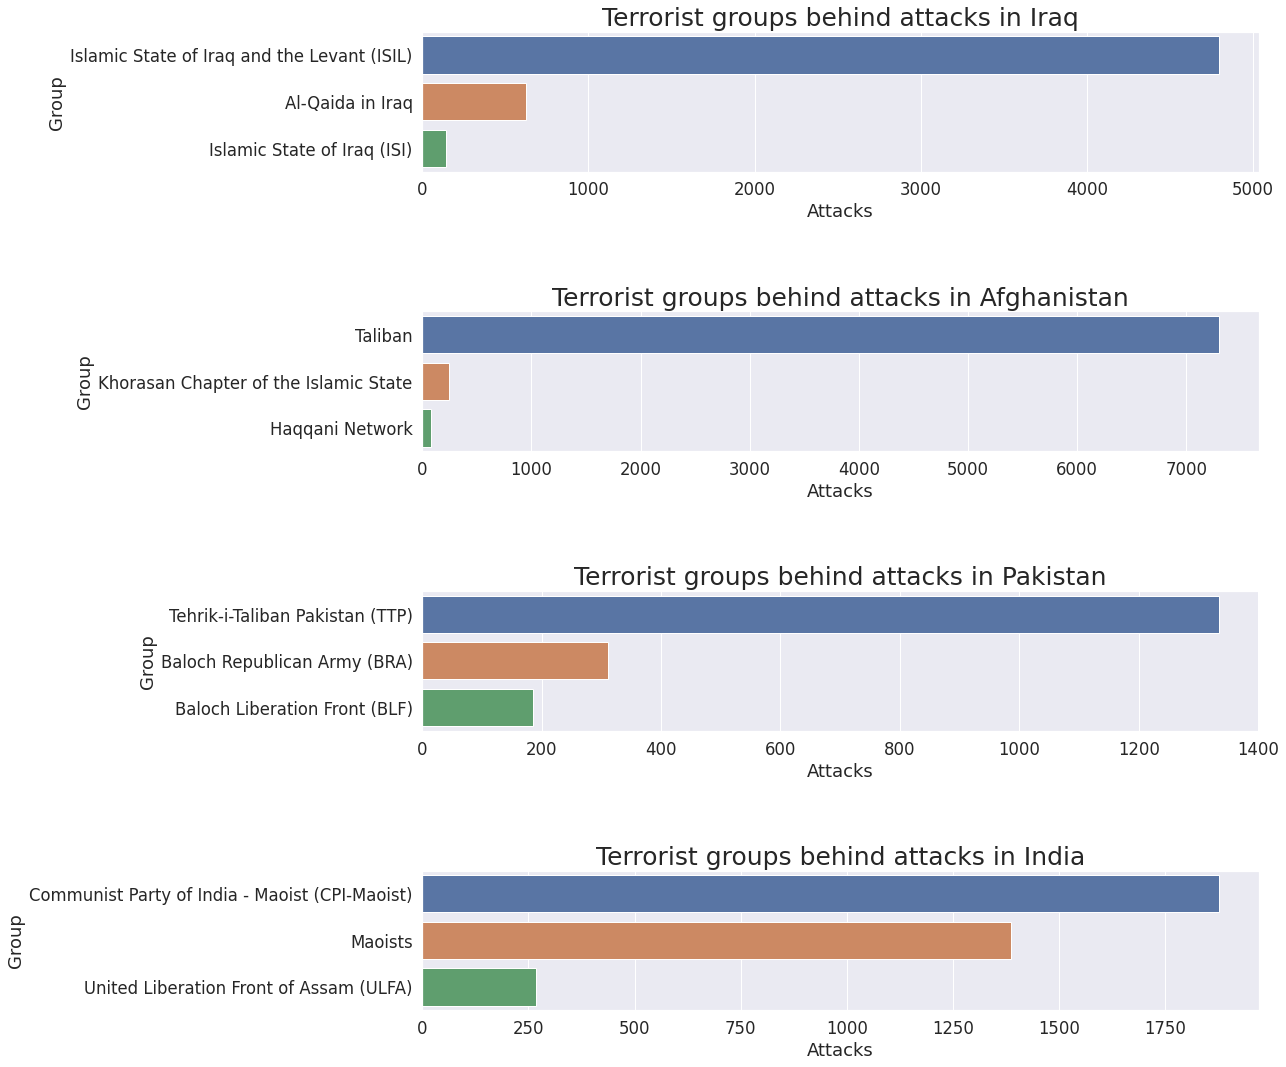

In [79]:
#Finding the main terrorist groups behind these 4 countries
plt.figure(figsize=(15,18))
sns.set(font_scale = 1.5)
for i in range(4):
    plt.subplot(4,1,i+1)
    c = after[(after['Country'] == countries[i]) & (after['Group']!='Unknown')].groupby('Group')['attack_type'].count().reset_index()
    c = c.sort_values(by = 'attack_type',ascending = False)[:3].rename(columns = {'attack_type':'Attacks'})
    b = sns.barplot(data=c,x='Attacks',y='Group')
    plt.title('Terrorist groups behind attacks in '+countries[i],fontsize=25)
plt.subplots_adjust(hspace = 1)
plt.show()

  We found in the above graph the major terroris groups that are behind these attacks

Initially we analysed the data along with multiple parameters, the no of attacks in each country,terrorist ativities across the years, the success rate of attacks,total casualities incurred across countries, types of attacks spanning across year etc. We also visulaize these analysis using different types of plots and graphs.
 During our analysis , we observed a sudden spike in the no of attacks from 2004 to 2015. Further we explored and analysed the countries and their no of attacks pre and post 2004. Also, we sorted out the main terroris groups that were active in these countries across the years.